### Sergio Cordova
### A00226919         Presentacion final

In [1]:
#pip install seaborn

In [2]:
#pip install statsmodels

In [3]:
#pip install sklearn

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [7]:
import seaborn as sns

### Introduction
### The data base that I chose was about Statistics from the Global 500 companies, which has some variables like
##### Ranking: it's the order from the biggest to the smallest company in this list
##### Name: name of the company
##### Country: from which country is the company originally
##### Sales: the sales per year from each company
##### Profit: it's the total earnings from each year
##### Assets: these are the possessions the company has
##### Market Value: what the company is worth in the market

In [8]:
%ls datasets

adult.csv                  Forbes-2021-Global-500-Companies-Statistics.csv
airline_data.csv           headbrain.csv
antropometria00.csv        mic2.xlsx
antropometria-dataset.csv  mic.xlsx
Book3.csv                  movies.csv
Canada.xlsx                nhanes_2015_2016.csv
Cartwheeldata.csv          pokemon.csv
census.csv                 reg_data.csv
coches.csv                 sample_pivot.csv
cwurData.csv               tips.csv
data.csv                   weight-height.csv


In [9]:
df = pd.read_csv('datasets/Forbes-2021-Global-500-Companies-Statistics.csv')
df.head(10)

,Rank,Name,Country,Sales $,Profit $,Assets $,Market Value $
0,1,ICBC,China,190500000000,45800000000,4914700000000,249500000000
1,2,JPMorgan Chase,United States,136200000000,40400000000,3689300000000,464800000000
2,3,Berkshire Hathaway,United States,245500000000,42500000000,873700000000,624400000000
3,4,China Construction Bank,China,173500000000,39300000000,4301700000000,210400000000
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229700000000,49300000000,510300000000,1897200000000
5,6,Apple,United States,294000000000,63900000000,354100000000,2252300000000
6,7,Bank of America,United States,98800000000,17900000000,2832200000000,336300000000
7,8,Ping An Insurance Group,China,169100000000,20800000000,1453800000000,211200000000
8,9,Agricultural Bank of China,China,153900000000,31300000000,4159900000000,140100000000
9,10,Amazon,United States,386100000000,21300000000,321200000000,1711800000000


## 1. Is there a correlation between the profits and the market value between the companies?

Text(0.5, 1.0, 'Profit vs Market Value')

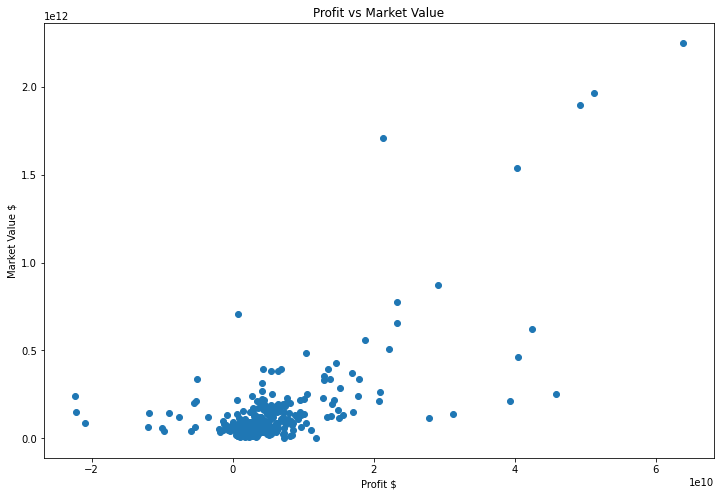

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(df['Profit $'], df['Market Value $'])
plt.xlabel('Profit $')
plt.ylabel('Market Value $')
plt.title('Profit vs Market Value')


#### As we can see in the graph, we don't have a strong correlation between the values, as they don't have an specific pattern, so we can conclude that the profits and the market value between the companies are not alike.

## 2. From the top 500 companies around the world, Which country or countries have the most companies in it? 

Text(0.5, 1.0, 'Countries Histogram')

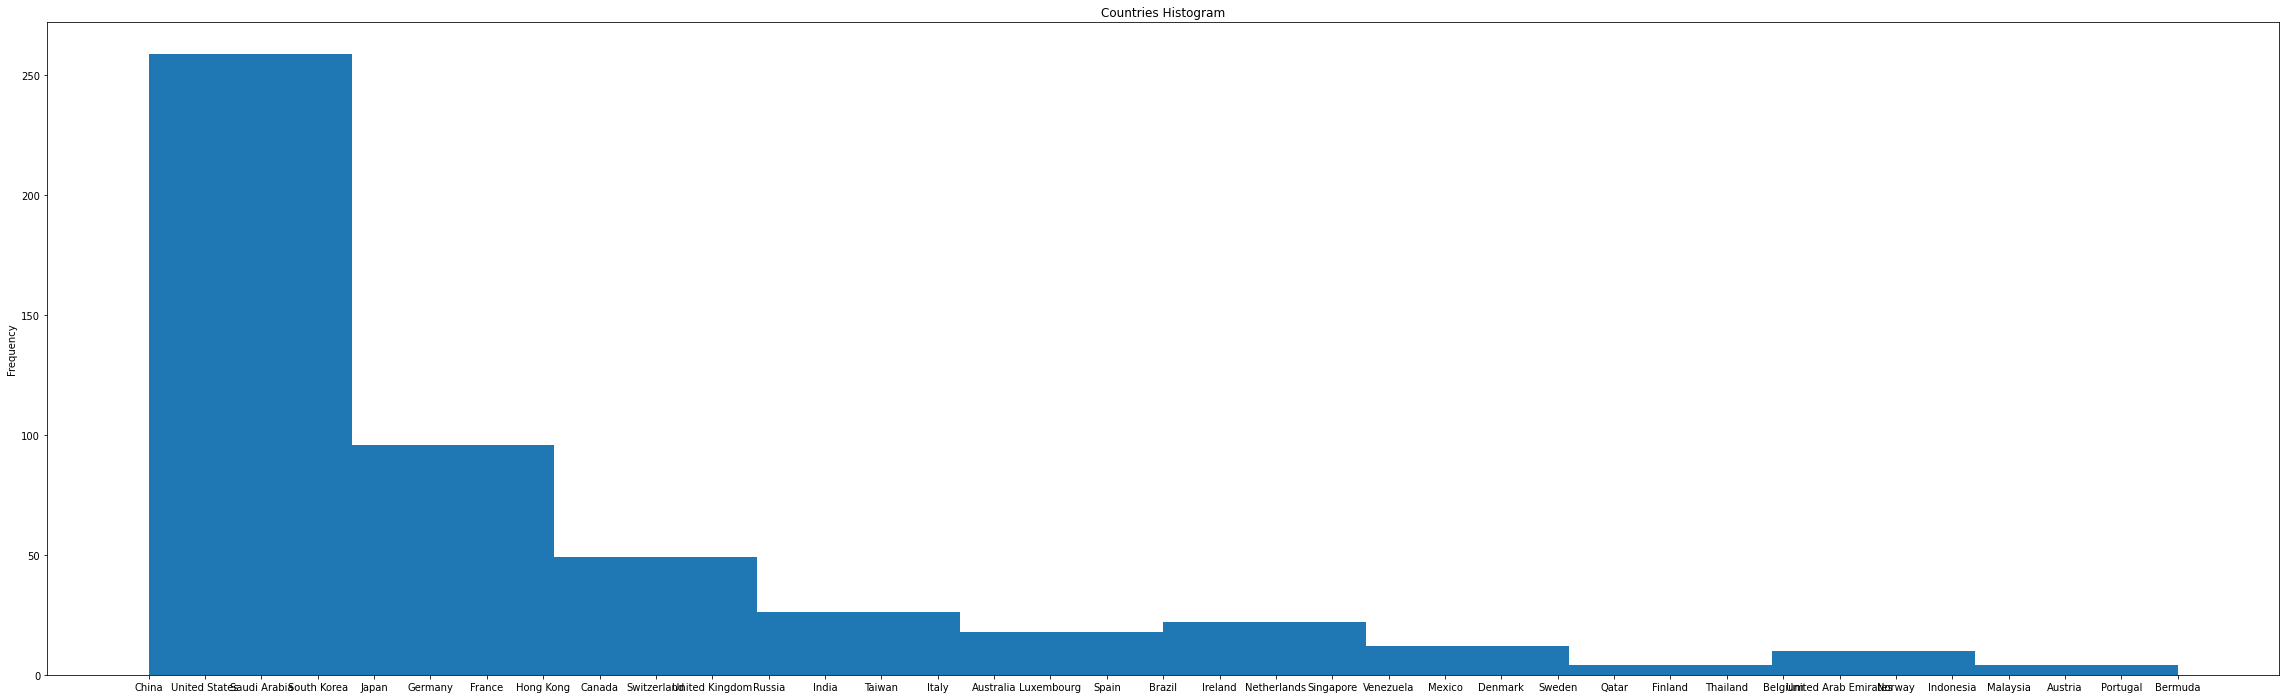

In [15]:
plt.figure(figsize=(40,12))
plt.hist(df['Country'])
plt.ylabel('Frequency')
plt.title('Countries Histogram')


#### As we can conclude from what we see in the histogram, USA, China, Saudi Arabia and South Korea are the countries with the most companies on this list.

## 3. Are there any outliers in sales between every company?

Text(0.5, 1.0, 'Sales boxplot')

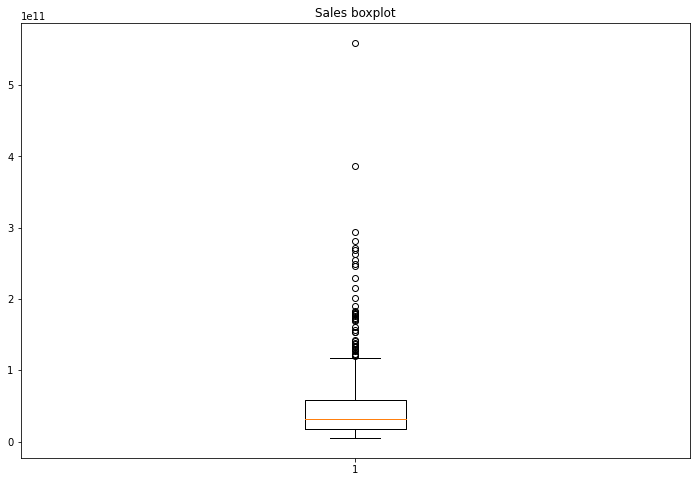

In [18]:
plt.figure(figsize=(12,8))
plt.boxplot(df['Sales $'])
plt.title('Sales boxplot')


### Looking at the boxplot, we can conclude that there are many outliers in sales, that means that where the majority of values in sales are from the lowest companies in the list and the outliers are the biggest companies in it.

## 4. In which range from the values in assets are the most companies in?

In [21]:
df['Assets $'].describe()

count    5.000000e+02
mean     3.229280e+11
std      6.310834e+11
min      1.480000e+10
25%      4.837500e+10
50%      1.092000e+11
75%      2.984750e+11
max      4.914700e+12
Name: Assets $, dtype: float64

In [22]:
for i in df['Assets $'].index:
  var = df['Assets $'][i]

  if var < 4.8375 * 10**10:
    df['Assets $'][i] = '<4.8375*(10^10)'
  elif var >= 4.8375 * 10**10 and var <= 1.092* 10**11:
    df['Assets $'][i] = '4.8375*(10^10) - 1.092*(10^11)'
  else:
    df['Assets $'][i] = '>1.092*(10^11)'


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

Text(0.5, 1.0, 'Assets $ Pie chart')

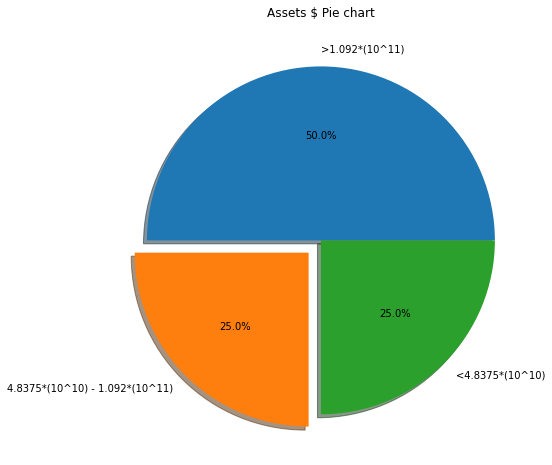

In [25]:
plt.figure(figsize=(12,8))
plt.pie(df['Assets $'].value_counts(), labels = df['Assets $'].unique(), autopct = '%1.1f%%', shadow = True, explode = (0, 0.1, 0) )
plt.title('Assets $ Pie chart')



### The range from where the most companies are located in assets is in higher than 1.092*(10^11), it means that where there is the most companies with similar assets is in the highest possition in the list.

## 5. Are the market value from this companies similar?

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Market Value Swarmplot')

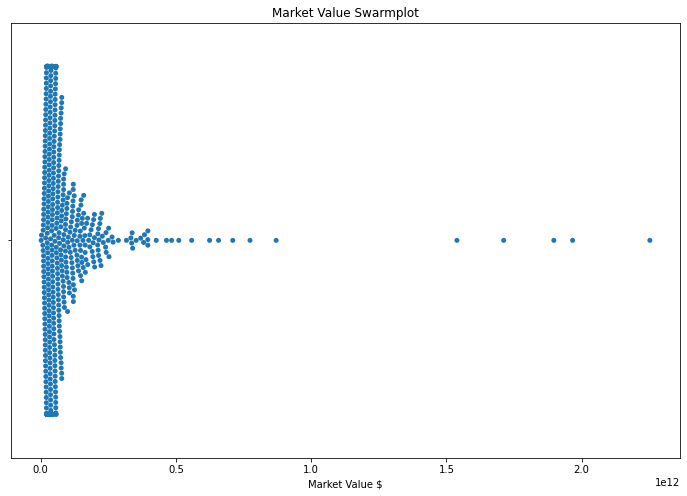

In [29]:
plt.figure(figsize=(12,8))
sns.swarmplot(x = df['Market Value $'])
plt.title('Market Value Swarmplot')

### As we can see in the swarmplot, the market value from every company are quite similar, except from some companies that are way higher than the others. 

## 6. In which country can we find the most companies on the Top 25 from the list?

Text(0.5, 1.0, 'First 25 data, countries histogram')

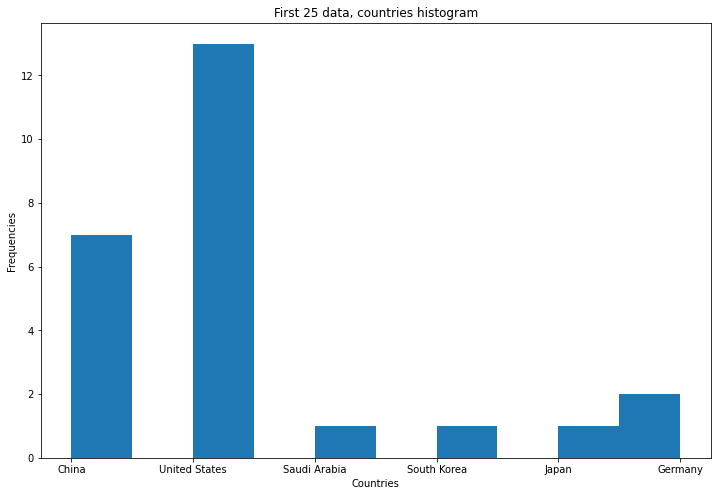

In [32]:
plt.figure(figsize=(12,8))
plt.hist(df[:25]['Country'])
plt.ylabel('Frequencies')
plt.xlabel('Countries')
plt.title('First 25 data, countries histogram')


### As we can clearly see, USA is the country with the most companies (13) on this Top 25 list, followed by China with 7 companies. 